In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import interpolate
from scipy.integrate import simps, romb, trapz

In [2]:
kB=8.6173324E-05 # eV/K
convRyd2eV=13.6057 # eV/Ryd

# Define final scattered electron energy and temperatures

In [3]:
ener=[1.00E-02,2.20E-01,4.89E-01,8.17E-01,1.22E+00,1.71E+00,2.30E+00,3.03E+00,3.92E+00,5.00E+00]
T=[3.0E+03,4.0E+03,5.0E+03,6.0E+03,7.0E+03,8.0E+03,9.0E+03,1.0E+04,1.1E+04,1.2E+04,1.3E+04,1.4E+04,1.5E+04,1.6E+04]

In [4]:
folder="om2ups/"
file_om="adf04_om"
file_ups="adf04_ups"

In [5]:
def findexp_replace(folder,filename):
    os.system("cp "+folder+filename+" tmp")
    os.system("sed -i 's/ /  /g' tmp")
    os.system("sed -i 's/+/E+/g' tmp")
    os.system("sed -i 's/-/E-/g' tmp")
    for i in range(99):
        if i<10: os.system("sed -i 's/+0"+str(i)+"E/+0"+str(i)+" /g' tmp")
        if i<10: os.system("sed -i 's/-0"+str(i)+"E/-0"+str(i)+" /g' tmp")
        if i>=10: os.system("sed -i 's/+"+str(i)+"E/+"+str(i)+" /g' tmp")
        if i>=10: os.system("sed -i 's/-"+str(i)+"E/-"+str(i)+" /g' tmp")

In [6]:
def interp_omg(n,x,y,xnew,kind):
    if kind=="cubic": spline=interpolate.interp1d(x, y, kind=kind)
    if kind=="akima": spline=interpolate.Akima1DInterpolator(x,y)
    ynew=spline(xnew)
    return ynew

In [7]:
nener=len(ener)
ntemp=len(T)
ntran=4

# Load omega data

In [8]:
findexp_replace(folder,file_om)

In [9]:
omgcols=[i for i in range(nener+4)]
omg=pd.read_csv("tmp",sep="\s+",header=None,skiprows=93,nrows=ntran,usecols=omgcols)
colsname= ['k','i','aki']
for i in range(nener):
    colsname.append(str(ener[i]))
colsname.append("inf")
omg.columns=colsname

In [10]:
omg

,k,i,aki,0.01,0.22,0.489,0.817,1.22,1.71,2.3,3.03,3.92,5.0,inf
0,2,1,1.000000e-30,1.52,6.45,4.670,2.450,1.1600,0.5780,0.3140,0.1870,0.11500,0.07240,0.0
1,3,1,4.280000e+08,3.14,8.18,14.900,22.000,28.8000,34.6000,40.4000,45.6000,50.60000,55.50000,-19.6
2,3,2,1.000000e-30,11.90,11.80,4.350,1.770,0.7680,0.3700,0.1970,0.1140,0.06830,0.04190,0.0
3,4,1,1.000000e-30,1.06,1.18,0.385,0.199,0.0892,0.0409,0.0216,0.0128,0.00795,0.00501,0.0


# Load upsilon data computed with ADAS postprocessor

In [11]:
findexp_replace(folder,file_ups)

In [12]:
upscols=[i for i in range(ntemp+4)]
ups_prev=pd.read_csv("tmp",sep="\s+",header=None,skiprows=93,nrows=ntran,usecols=upscols)
colsname= ['k','i','aki']
for i in range(ntemp):
    colsname.append(str(T[i]))
colsname.append("inf")
ups_prev.columns=colsname

In [13]:
ups_prev

,k,i,aki,3000.0,4000.0,5000.0,6000.0,7000.0,8000.0,9000.0,10000.0,11000.0,12000.0,13000.0,14000.0,15000.0,16000.0,inf
0,2,1,1.000000e-30,1.160,1.420,1.650,1.850,2.030,2.200,2.360,2.510,2.640,2.770,2.890,2.990,3.090,3.180,0.0
1,3,1,4.280000e+08,2.120,2.530,2.840,3.110,3.360,3.580,3.780,3.980,4.170,4.360,4.540,4.710,4.890,5.060,-19.6
2,3,2,1.000000e-30,7.030,8.010,8.670,9.130,9.470,9.730,9.930,10.100,10.200,10.300,10.400,10.400,10.400,10.400,0.0
3,4,1,1.000000e-30,0.633,0.724,0.786,0.831,0.865,0.892,0.913,0.929,0.942,0.953,0.961,0.967,0.971,0.974,0.0


# Simple interpolation of $\Omega(i\rightarrow k)$ for 4 excitations: 

In [14]:
npts=4097
ener_new=np.linspace(ener[0], ener[nener-1], npts)
omgdat=[]
omgint=[]
for i in range(ntran):
    y=omg.loc[i][3:-1].values
    ynew=interp_omg(nener,ener,y,ener_new,'akima')
    omgdat.append(y)
    omgint.append(ynew)

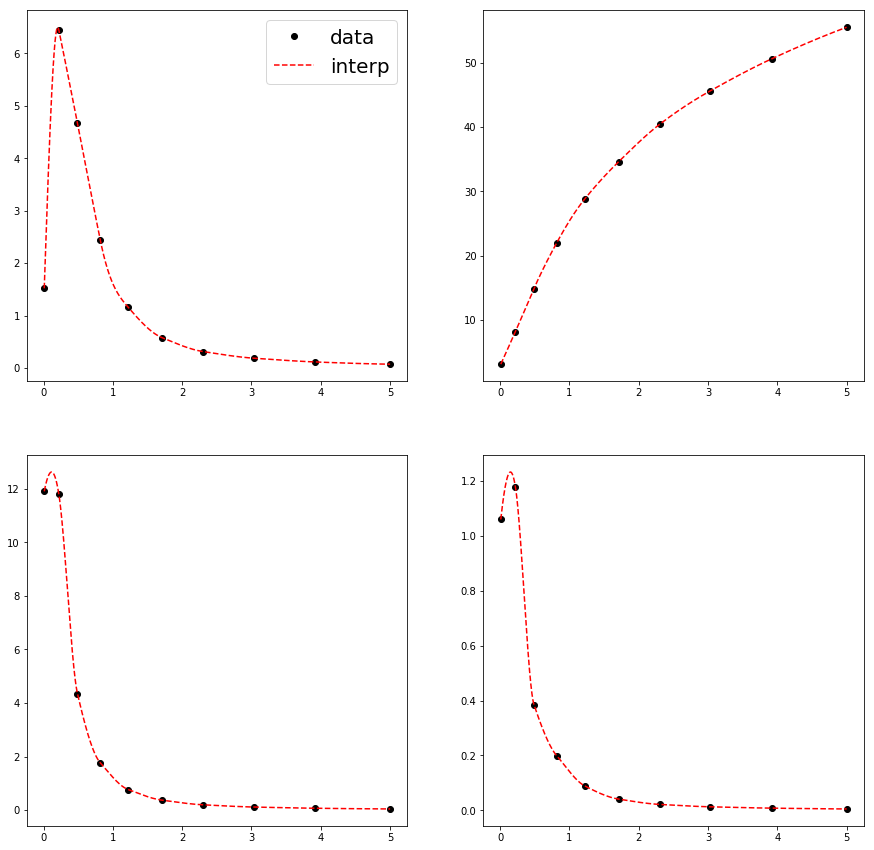

In [15]:
fig,axs=plt.subplots(2,2,figsize=(15,15))
axs[0,0].plot(ener,omgdat[0],'ko',label="data")
axs[0,0].plot(ener_new,omgint[0],'r--',label="interp")
axs[0,0].legend(loc='best',fontsize=20)
axs[0,1].plot(ener,omgdat[1],'ko',label="data")
axs[0,1].plot(ener_new,omgint[1],'r--',label="interp")
axs[1,0].plot(ener,omgdat[2],'ko',label="data")
axs[1,0].plot(ener_new,omgint[2],'r--',label="interp")
axs[1,1].plot(ener,omgdat[3],'ko',label="data")
axs[1,1].plot(ener_new,omgint[3],'r--',label="interp")
plt.show()

# Test convergence of number of points in interpolation: 20, 50, 100, 5000

In [16]:
y=omg.loc[0][3:-1].values
yups_10simps=[]
yups_10trapz=[]
for i in range(ntemp):
    kBT=kB*T[i]
    arg=np.array(ener)*convRyd2eV/kBT
    yint=y*np.exp(-arg)
    I1=simps(yint, arg)
    I3=trapz(yint, arg)
    yups_10simps.append(I1)
    yups_10trapz.append(I3)

In [17]:
npts=2**4+1
ener_new=np.linspace(ener[0], ener[nener-1], npts)
dener=ener_new[1]-ener_new[0]
y=omg.loc[0][3:-1].values
ynew=interp_omg(nener,ener,y,ener_new,'akima')
yups_1simps=[]
yups_1romb=[]
yups_1trapz=[]
for i in range(ntemp):
    kBT=kB*T[i]
    arg=ener_new*convRyd2eV/kBT
    darg=dener*convRyd2eV/kBT
    yint=ynew*np.exp(-arg)
    I1=simps(yint, arg)
    I2=romb(yint, darg)
    I3=trapz(yint, arg)
    yups_1simps.append(I1)
    yups_1romb.append(I2)
    yups_1trapz.append(I3)

In [18]:
npts=2**6+1
ener_new=np.linspace(ener[0], ener[nener-1], npts)
dener=ener_new[1]-ener_new[0]
y=omg.loc[0][3:-1].values
ynew=interp_omg(nener,ener,y,ener_new,'akima')
yups_2simps=[]
yups_2romb=[]
yups_2trapz=[]
for i in range(ntemp):
    kBT=kB*T[i]
    arg=ener_new*convRyd2eV/kBT
    darg=dener*convRyd2eV/kBT
    yint=ynew*np.exp(-arg)
    I1=simps(yint, arg)
    I2=romb(yint, darg)
    I3=trapz(yint, arg)
    yups_2simps.append(I1)
    yups_2romb.append(I2)
    yups_2trapz.append(I3)

In [19]:
npts=2**8+1
ener_new=np.linspace(ener[0], ener[nener-1], npts)
dener=ener_new[1]-ener_new[0]
y=omg.loc[0][3:-1].values
ynew=interp_omg(nener,ener,y,ener_new,'akima')
yups_3simps=[]
yups_3romb=[]
yups_3trapz=[]
for i in range(ntemp):
    kBT=kB*T[i]
    arg=ener_new*convRyd2eV/kBT
    darg=dener*convRyd2eV/kBT
    yint=ynew*np.exp(-arg)
    I1=simps(yint, arg)
    I2=romb(yint, darg)
    I3=trapz(yint, arg)
    yups_3simps.append(I1)
    yups_3romb.append(I2)
    yups_3trapz.append(I3)

In [20]:
npts=2**10+1
ener_new=np.linspace(ener[0], ener[nener-1], npts)
dener=ener_new[1]-ener_new[0]
y=omg.loc[0][3:-1].values
ynew=interp_omg(nener,ener,y,ener_new,'akima')
yups_4simps=[]
yups_4romb=[]
yups_4trapz=[]
for i in range(ntemp):
    kBT=kB*T[i]
    arg=ener_new*convRyd2eV/kBT
    darg=dener*convRyd2eV/kBT
    yint=ynew*np.exp(-arg)
    I1=simps(yint, arg)
    I2=romb(yint, darg)
    I3=trapz(yint, arg)
    yups_4simps.append(I1)
    yups_4romb.append(I2)
    yups_4trapz.append(I3)

In [21]:
npts=2**12+1
ener_new=np.linspace(ener[0], ener[nener-1], npts)
dener=ener_new[1]-ener_new[0]
y=omg.loc[0][3:-1].values
ynew=interp_omg(nener,ener,y,ener_new,'akima')
yups_5simps=[]
yups_5romb=[]
yups_5trapz=[]
for i in range(ntemp):
    kBT=kB*T[i]
    arg=ener_new*convRyd2eV/kBT
    darg=dener*convRyd2eV/kBT
    yint=ynew*np.exp(-arg)
    I1=simps(yint, arg)
    I2=romb(yint, darg)
    I3=trapz(yint, arg)
    yups_5simps.append(I1)
    yups_5romb.append(I2)
    yups_5trapz.append(I3)

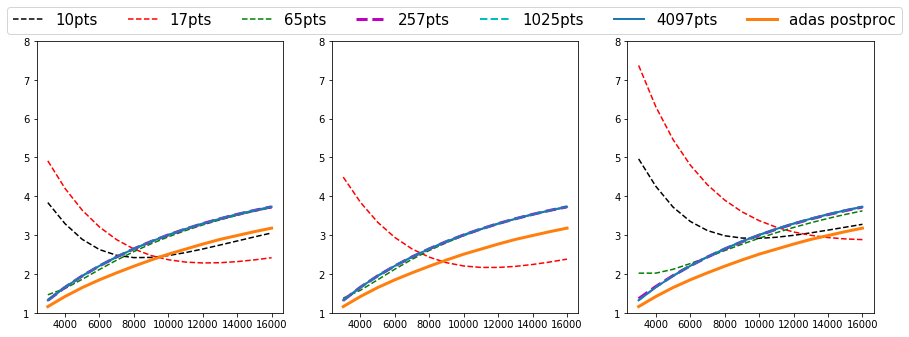

In [22]:
fig, axs=plt.subplots(1,3,figsize=(15,5))
axs[0].plot(T,yups_10simps,'k--',label='10pts')
axs[0].plot(T,yups_1simps,'r--',label='17pts')
axs[0].plot(T,yups_2simps,'g--',label='65pts')
axs[0].plot(T,yups_3simps,'m--',linewidth=3,label='257pts')
axs[0].plot(T,yups_4simps,'c--',linewidth=2,label='1025pts')
axs[0].plot(T,yups_5simps,'tab:blue',linewidth=2,label='4097pts')
axs[0].plot(T,ups_prev.iloc[0][3:-1],'tab:orange',linewidth=3,label='adas postproc')
axs[0].legend(loc='lower left',bbox_to_anchor=[-0.15,1],fontsize=15,ncol=7)
axs[1].plot(T,yups_1romb,'r--')
axs[1].plot(T,yups_2romb,'g--')
axs[1].plot(T,yups_3romb,'m--',linewidth=3)
axs[1].plot(T,yups_4romb,'c--',linewidth=2)
axs[1].plot(T,yups_5romb,'tab:blue',linewidth=2)
axs[1].plot(T,ups_prev.iloc[0][3:-1],'tab:orange',linewidth=3)
axs[2].plot(T,yups_10trapz,'k--')
axs[2].plot(T,yups_1trapz,'r--')
axs[2].plot(T,yups_2trapz,'g--')
axs[2].plot(T,yups_3trapz,'m--',linewidth=3)
axs[2].plot(T,yups_4trapz,'c--',linewidth=2)
axs[2].plot(T,yups_5trapz,'tab:blue',linewidth=2)
axs[2].plot(T,ups_prev.iloc[0][3:-1],'tab:orange',linewidth=3)
axs[0].set_ylim(1,8)
axs[1].set_ylim(1,8)
axs[2].set_ylim(1,8)
plt.show()

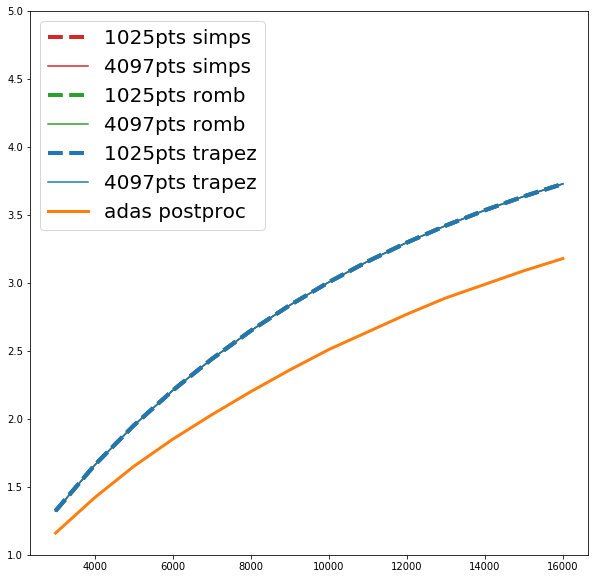

In [23]:
fig, axs=plt.subplots(1,1,figsize=(10,10))
axs.plot(T,yups_4simps,'tab:red',linestyle='dashed',linewidth=4,label='1025pts simps')
axs.plot(T,yups_5simps,'tab:red',label='4097pts simps')
axs.plot(T,yups_4romb,'tab:green',linestyle='dashed',linewidth=4,label='1025pts romb')
axs.plot(T,yups_5romb,'tab:green',label='4097pts romb')
axs.plot(T,yups_4trapz,'tab:blue',linestyle='dashed',linewidth=4,label='1025pts trapez')
axs.plot(T,yups_5trapz,'tab:blue',label='4097pts trapez')
axs.plot(T,ups_prev.iloc[0][3:-1],'tab:orange',linewidth=3,label='adas postproc')
axs.legend(loc='best',fontsize=20)
axs.set_ylim(1,5)
plt.show()

# Make pandas with new upsilon

In [24]:
ups_curr=ups_prev.copy()

In [25]:
for j in range(ntran):
    for i in range(ntemp):
        ups_curr.loc[j,str(T[i])]=0.

In [26]:
npts=2**10+1
ener_new=np.linspace(ener[0], ener[nener-1], npts)
for j in range(ntran):
    y=omg.loc[j][3:-1].values
    ynew=interp_omg(nener,ener,y,ener_new,'akima')
    yups=[]
    for i in range(ntemp):
        kBT=kB*T[i]
        arg=ener_new*convRyd2eV/kBT
        yint=ynew*np.exp(-arg)
        I1=simps(yint, arg)
        yups.append(I1)
        ups_curr.loc[j,str(T[i])]=I1
    print(j,yups[:4])

0 [1.32191604807399, 1.6591658754993988, 1.9505148704344795, 2.208679116672751]
1 [2.1204085658804672, 2.520036549794811, 2.8371175938059023, 3.1067249316264385]
2 [7.153520749870073, 8.192865531781349, 8.894394743591695, 9.39666832814579]
3 [0.6493818829884765, 0.7477942422303872, 0.8159065529109981, 0.8659403853890283]


In [27]:
ups_curr

,k,i,aki,3000.0,4000.0,5000.0,6000.0,7000.0,8000.0,9000.0,10000.0,11000.0,12000.0,13000.0,14000.0,15000.0,16000.0,inf
0,2,1,1.000000e-30,1.321916,1.659166,1.950515,2.208679,2.440010,2.648290,2.836190,3.005845,3.159078,3.297494,3.422529,3.535463,3.637447,3.729510,0.0
1,3,1,4.280000e+08,2.120409,2.520037,2.837118,3.106725,3.346751,3.567195,3.774060,3.971150,4.160985,4.345287,4.525268,4.701797,4.875506,5.046866,-19.6
2,3,2,1.000000e-30,7.153521,8.192866,8.894395,9.396668,9.770049,10.053842,10.271816,10.439346,10.566976,10.662299,10.731013,10.777542,10.805406,10.817466,0.0
3,4,1,1.000000e-30,0.649382,0.747794,0.815907,0.865940,0.904099,0.933851,0.957304,0.975833,0.990394,1.001691,1.010260,1.016527,1.020837,1.023477,0.0


In [28]:
ups_prev

,k,i,aki,3000.0,4000.0,5000.0,6000.0,7000.0,8000.0,9000.0,10000.0,11000.0,12000.0,13000.0,14000.0,15000.0,16000.0,inf
0,2,1,1.000000e-30,1.160,1.420,1.650,1.850,2.030,2.200,2.360,2.510,2.640,2.770,2.890,2.990,3.090,3.180,0.0
1,3,1,4.280000e+08,2.120,2.530,2.840,3.110,3.360,3.580,3.780,3.980,4.170,4.360,4.540,4.710,4.890,5.060,-19.6
2,3,2,1.000000e-30,7.030,8.010,8.670,9.130,9.470,9.730,9.930,10.100,10.200,10.300,10.400,10.400,10.400,10.400,0.0
3,4,1,1.000000e-30,0.633,0.724,0.786,0.831,0.865,0.892,0.913,0.929,0.942,0.953,0.961,0.967,0.971,0.974,0.0


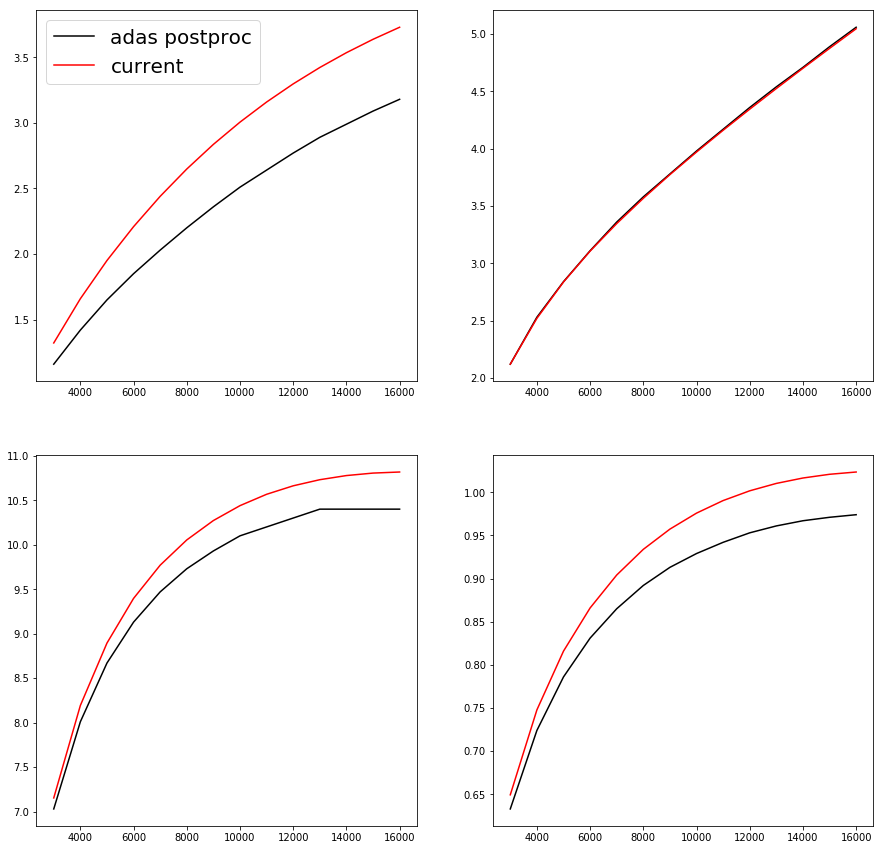

In [29]:
fig,axs=plt.subplots(2,2,figsize=(15,15))
axs[0,0].plot(T,ups_prev.loc[0][3:-1],'k',label="adas postproc")
axs[0,0].plot(T,ups_curr.loc[0][3:-1],'r',label="current")
axs[0,0].legend(loc='best',fontsize=20)
axs[0,1].plot(T,ups_prev.loc[1][3:-1],'k')
axs[0,1].plot(T,ups_curr.loc[1][3:-1],'r')
axs[1,0].plot(T,ups_prev.loc[2][3:-1],'k')
axs[1,0].plot(T,ups_curr.loc[2][3:-1],'r')
axs[1,1].plot(T,ups_prev.loc[3][3:-1],'k')
axs[1,1].plot(T,ups_curr.loc[3][3:-1],'r')
plt.show()